<a href="https://colab.research.google.com/github/rhehgus02/ESAA_OB/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C(1)_%EC%BC%80%EB%9D%BC%EC%8A%A4(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<01> 케라스(Keras)**

## **1. 딥러닝 준비**

* 2019년 9월 텐서플로2에 생긴 가장 큰 변화: 텐서플로가 케라스 API를 내재화했다는 것

* 케라스 API: 고수준 딥러닝 라이브러리

    * 다른 딥러닝 라이브러리와 가장 큰 차이: GPU 연산을 수행하는 기능을 직접 실행하지 않고 텐서플로, CNTK 등의 백엔드 엔진을 지정하여 사용함

    * 목적: 딥러닝 라이브러리를 쉽고 간결한 코드로 실행할 수 있게 만들어주는 것

    * 장점: 직관적이고 사용자 친화적으로 설계되어 있어 코딩의 난이도가 어렵지 않음, 백엔드 엔진을 쉽게 변경할 수 있음

    * 단점: 복잡한 구조의 모델 구현과 사용자 정의 훈련을 위해서는 텐서플로의 저수준 API를 활용해야 함



---

### **1-1. 주요 용어**

#### **(1) 하이퍼파라미터**

* 하이퍼파라미터: 딥러닝뿐만 아니라 머신러닝 모델을 훈련할 때 사용자가 직접 설정해주는 설정 값

    -> 모델이 훈련하면서 가중치와 편향은 자동 업데이트되고 조정되며 알아서 변하지만, 그 외에 학습 속도나 반복 훈련 횟수 등 사용자가 직접 설정해야 하는 값들이 매우 많음

* 사용자가 하이퍼파라미터에 어떠한 값을 설정하느냐에 따라 모델의 성능 및 결과가 달라지기 때문에 매우 중요함

    ->사용자가 별도로 설정해주지 않으면 기본값이 지정되어 있어서 자동으로 적용됨

* 하이퍼파라미터 튜닝: 모델의 예측 성능을 높이기 위해 하이퍼파라미터 값들을 조절하는 것

#### **(2) 과소적합 vs 과대적합**

* 머신러닝 학습에 있어 데이터는 크게 훈련용 데이터와 예측용 데이터로 구분할 수 있음

    * 훈련용 데이터: 머신러닝 모델이 학습할 데이터

    * 예측용 데이터: 레이블이 없는 머신러닝 모델이 예측해야 하는 대상 데이터

* 머신러닝에서 주어진 훈련 데이터에서 패턴 학습을 통해 모델을 완성해 나감

    -> 하지만 예측할 데이터가 모델이 학습한 데이터와 다른 분포를 갖거나, 혹은 학습한 데이터가 특정 레이블에 편향된 데이터로 이루어져 있으면 모델이 학습한 후 예측 성능이 현저히 떨어지게 됨

* 과소적합: 모델이 충분히 학습되지 않은 경우 예측 성능이 떨어지는 것

* 과대적합: 학습 데이터를 지나치게 반복 학습하게 되어 과하게 적합된 상태

    -> 훈련 데이터에 존재하는 불필요한 노이즈까지 과도하게 모델에 반영되어 주어진 훈련 데이터에 대한 예측 성능이 좋지만, 정작 예측 데이터에서는 예측 오차가 발생할 확률이 커짐

* 모델을 학습시킬 때는 과소적합과 과대적합 문제를 최소화하면서 정확도를 가장 높일 수 있도록 해야 함

    * 훈련 데이터를 예측 데이터와 분포가 동일하게 구성해야 하며 불필요한 노이즈는 데이터 분석 및 전처리를 통해 해소해야 함

    * 훈련 데이터의 일부를 검증 데이터로 활요하여 검증 성능이 가장 좋은 구간을 모델의 가장 이상적으로 학습된 지점이라 판단해 최종 모델 결정

#### **(3) 에포크(epoch)**

* 에포크: 딥러닝 모델이 반복 훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프

    -> 훈련 데이터셋을 빠짐없이 모두 1번 모델 훈련에 사용하면 1 epoch의 훈련 과정을 마치고 다음 epoch로 넘어감

* 사전에 설정한 최대 epoch까지 반복 학습이 끝나더라도 모델이 과소적합되었다고 판단되면 epoch를 늘려서 다시 학습할 필요가 있음

    -> 그와 반대로 모델이 빠르게 과대적합 구간으로 진입한다면 epoch를 줄여서 최적 구간에서 학습을 조기에 종료시켜야 함

#### **(4) 손실함수(loss function)**

* 손실함수: 예측 값과 정답 값의 차이 또는 오차

* 딥러닝 모델에 적용하는 손실함수는 사용자가 정의해야 함

    -> 분류나 회귀 모델에 따라 손실함수를 다르게 적용하는 것이 일반적

* 지도 학습의 분류 문제는 이진 분류와 다중 분류로 구분됨

    * 이진 분류

        * 손실함수: 'binary_crossentropy'

        * 출력층 활성화 함수: 'sigmoid'

    * 다중 분류

        * 손실함수: 'categorical_crossentropy'(원핫 벡터) / 'sparse_categorical_crossentropy'(레이블 값)

        * 출력층 활성화 함수: 'softmax'

* 회귀 모델의 경우 MSE, MAE, Huber 등이 사용됨

* 텐서플로는 사전 정의된 손실함수를 함수형과 클래스형으로 제공함


In [ ]:
import tensorflow as tf

# 클래스형
tf.keras.losses.BinaryCrossentropy()

# 함수형
tf.keras.losses.binary_crossentropy

<function keras.src.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>


#### **(5) 경사하강법(gradient descent)**

* 경사하강법: 딥러닝 모델을 훈련할 때, 모델 내부의 가중치에 대한 미분 값을 구하고 손실함수 값이 낮아지는 방향으로 차감하면서 결국 최소 함수 값을 갖도록 하는 방법

    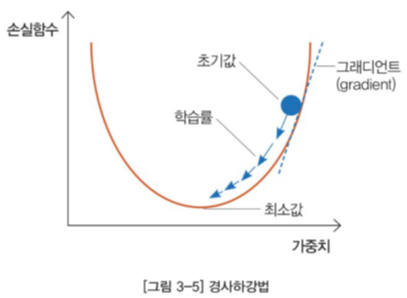

* 경사하강법 알고리즘을 적용하여 손실함수 값을 최소로 만드는 가중치를 찾을 수 있음

* 넘파이로 경사하강법 구현하기

    * 손실함수를 다음과 같이 정의

    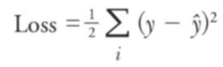

    * 단순 선형회귀 수식 y = wx + b 주어졌을 때, 손실함수를 최소로 하는 w와 b를 구함


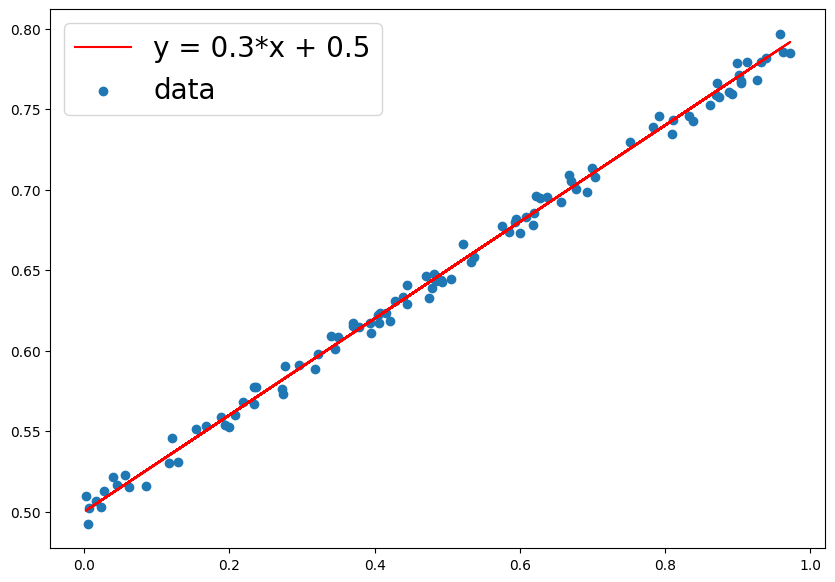

w: 0.3, b: 0.5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터셋 만들기
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    plt.figure(figsize=(10,7))
    plt.plot(x, y, color='r', label=f'y = {w}*x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

* 경사하강법 알고리즘의 핵심인 w, b에 대한 그래디언트를 구하는 부분 구현하기

    -> 그래디언트는 손실함수를 w, b에 대한 각각의 편미분 값을 구한 뒤 학습률 계수를 곱하여 이전의 w, b로부터 차감

    

In [ ]:
# 최대 반복 횟수
num_epoch = 1000

# 학습률(learning_rate)
learning_rate = 0.005

# 에러 기록
errors = []

# random한 값으로 w, b를 초기화
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    # Hypothesis 정의
    y_hat = w * x + b

    # Loss Function 정의
    error = 0.5*((y_hat-y)**2).sum()
    if error < 0.005:
        break
    # Gradient 미분 계산
    w = w - learning_rate * ((y_hat-y)*x).sum()
    b = b - learning_rate * (y_hat-y).sum()

    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch,w,b,error))

print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch,w,b,error))

 0 w = 0.24612, b = 0.60671 error = 2.26289
 5 w = 0.22652, b = 0.53885 error = 0.02401
10 w = 0.23703, b = 0.53276 error = 0.01770
15 w = 0.24615, b = 0.52796 error = 0.01322
20 w = 0.25391, b = 0.52387 error = 0.00999
25 w = 0.26050, b = 0.52040 error = 0.00765
30 w = 0.26610, b = 0.51745 error = 0.00596
------------------------------------------------------------
34 w = 0.3, b = 0.5 error = 0.00496


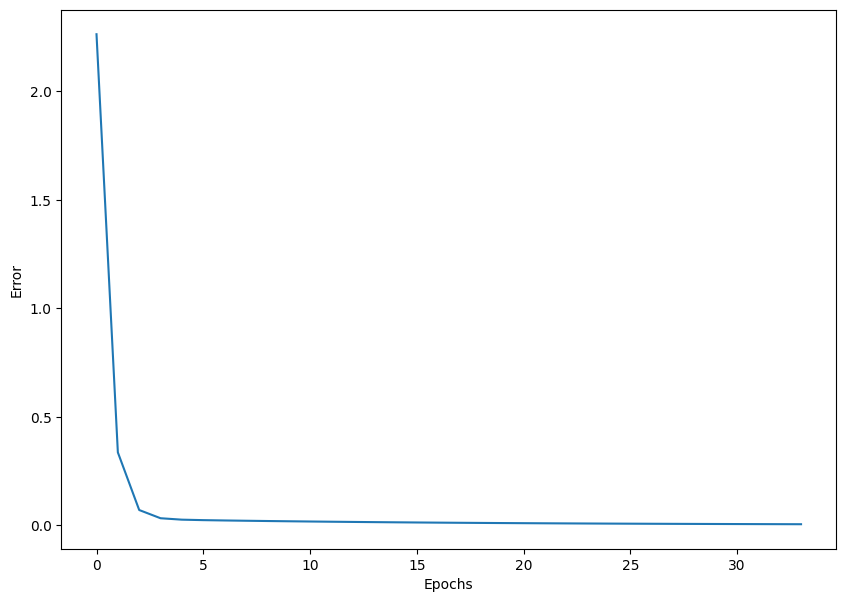

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

>> 가중치가 난수 값에 의하여 다르게 초기화되기 때문에 매번 수렴하는 속도는 차이가 있지만, 결국 목표하는 오차 범위 안으로 수렴하여 반복문을 종료하게 됨

>> 종료 후 w, b 계수를 확인하면 샘플 데이터셋을 생성할 때 설정한 w, b 계수와 비슷한 값임

---

### **1-2. 딥러닝 프로세스**

* 딥러닝 모델 구축 및 훈련을 위한 프로세스

    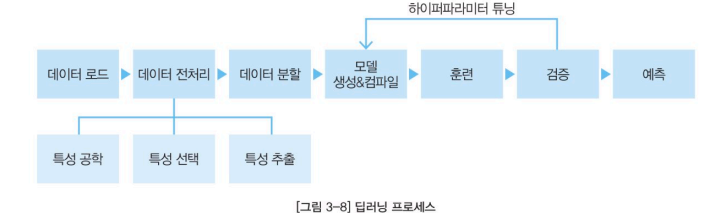


#### **(1) 데이터 전처리**

* 데이터 전처리: 데이터를 모델에 주입하기 전에 데이터를 가공하는 단계

    -> 데이터셋의 종류와 적용하려는 문제 유형에 따라 전처리 방법은 다양함

    -> 때에 따라 배열의 차원을 변경하거나 스케일을 조정할 수 있음

* 전처리 단계에서 데이터셋의 형태나 차원을 미리 구상해야 다음 단계에서 모델을 설계할 때 입력할 데이터셋의 형태를 올바르게 정의할 수 있음


#### **(2) 모델 생성**

* 모델 생성: 모델의 구조를 정의하고 생성하는 단계

* 모델 생성 방법은 크게 세 가지로 구분됨

    * 순차적인 구조의 모델은 Sequential API로 구현함

    * 다중 입력 및 출력을 가지고 복잡한 구조를 갖는 모델은 Functional API 또는 Model Subclassing 방법으로 구현함


#### **(3) 모델 컴파일**

* 컴파일: 딥러닝 모델의 구조를 정의하고 생성한 뒤, 생성된 모델 훈련에 사용할 손실함수, 옵티마이저, 평가지표 등을 정의하는 것

    -> 모델 인스턴스에 `compile()` 메소드를 적용하고, 앞에서 열거한 여러 가지 속성 값을 설정함

#### **(4) 모델 훈련**

* `fit()` 함수에 모델 훈련에 필요한 정보를 매개변수로 전달

    * 훈련 데이터셋, 검증 데이터셋, epoch 배치 크기, callback 함수 등을 지정

#### **(5) 모델 검증**

* 모델 검증: 모델을 훈련할 때 사용하지 않은 검증 데이터셋을 모델에 입력하고 모델의 예측 값을 정답과 비교하여 평가지표를 계산

    -> 반환된 검증 결과를 토대로 잠재적인 모델의 성능 평가가 이뤄짐

    -> 검증 결과를 바탕으로 다시 모델 생성 단계로 돌아가 모델 수정을 하고, 훈련 및 평가를 다시 거쳐 목표 성능에 도달할 때까지 과정을 반복

#### **(6) 모델 예측**

* 모델 예측: 훈련과 검증이 완료된 모델로 테스트셋에 대하여 모델이 예측하고 그 결과를 반환함

---

## **2. 단순 신경망 훈련**

### **2-1. 선형회귀**

* 회귀 분석: 하나 이상의 독립변수들이 종속변수에 미치는 영향을 추정하는 통계 기법

* 단순선형회귀: 하나의 X가 Y에 미치는 영향을 추정하며 1차 함수 관계로 나타낼 수 있음(y=wx+b, w:가중치, b:편향)

---

### **2-2. 뉴런**

* 뉴런(노드): 인공 신경망 모델을 구성하는 하나의 신경

* 신경망은 여러 개의 레이어를 가지며 1개의 레이어는 1개 이상의 뉴런으로 구성됨

    * 뉴런의 내부에는 가중치가 존재하고 모델이 훈련을 진행하면서 오차 역전파를 통해 뉴런의 가중치가 업데이트됨

---

### **2-3. Dense 레이어**

* Dense 레이어: 심층 신경망 모델을 구성하는 가장 기본 레이어

    -> 각 레이어와 레이어 사이에 모든 뉴런이 서로 연결되어 있기 때문에 완전 연결층이라고도 부름

    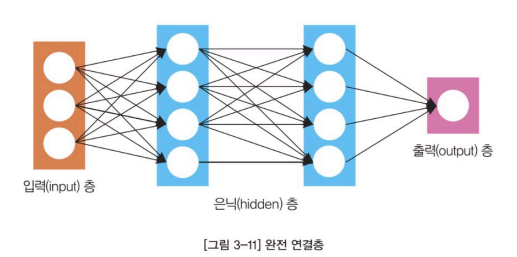

    -> 4개의 Dense 레이어로 구성된 모델

    -> 입력 레이어 1개, 은닉 레이어 2개, 출력 레이어 1개로 구성되어 있음

    -> 각 레이어는 1개 이상의 뉴런으로 구성됨

    -> 모든 뉴런들이 서로 연결되어 있음

* Dense 레이어를 구성하는 노드 개수와 활성화 함수를 지정할 수 있음

    -> 노드의 개수는 Dense 레이어의 첫 번째 위치 인자로 지정하면 됨

    -> 활성화 함수는 Dense 레이어의 activation 매개변수에 지정

In [ ]:
import tensorflow as tf

# 10개의 노드로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)

# ReLU 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')

---

### **2-4. 데이터셋 만들기**

* 단순선형회귀 모형을 지도학습 방식으로 훈련하기 위해 x, y 데이터를 생성

    -> 넘파이 `arange()` 메소드를 활용하여 5개의 순차적인 x 데이터를 생성하고, 임의의 1차 함수인 y=3x+2 관계식에 대입해 y 데이터 생성

In [ ]:
# 샘플 데이터셋 생성
x = np.arange(1,6)

# y = 3x + 2
y = 3*x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


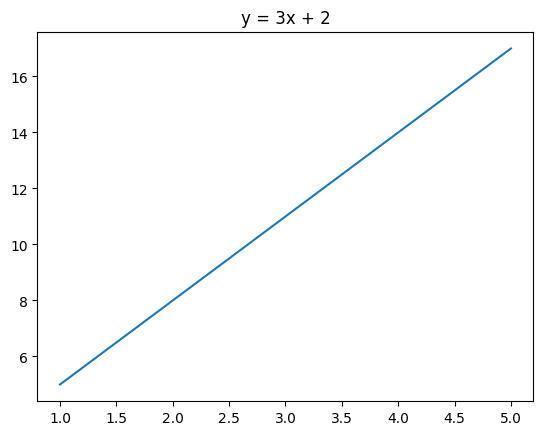

In [ ]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x,y)
plt.title('y = 3x + 2')
plt.show()

>> 모델에 입력할 데이터의 준비가 끝남

---

### **2-5. Sequential API**

* Sequential API: 층을 이어 붙이듯 시퀀스에 맞게 일렬로 연결하는 방식

    -> 입력 레이어부터 출력 레이어까지 순서를 가짐

    -> 입력 데이터는 시퀀스의 가장 앞에 위치한 층에 투입되고, 순서대로 각 층을 하나씩 통과하면서 딥러닝 연산을 수행

#### **(1) 모델 구조**

* 두 가지 방법으로 모델을 구성할 수 있음

    * 리스트형 정의: Sequential 클래스 함수에 파이썬 리스트 형태로 여러 개의 층을 입력

        -> 대괄호 안에 쉼표로 구분하여 층을 쌓음

    * `add()` 함수: Sequential 클래스 객체를 먼저 만든 후, 생성된 모델 인스턴스에 층을 추가

        -> `add()` 메소드 함수를 사용하여 1개의 층을 추가할 수 있음

In [ ]:
import tensorflow as tf

# 리스트형
model = tf.keras.Sequential([
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(5),
        tf.keras.layers.Dense(1)
])

In [ ]:
# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

#### **(2) 입력 데이터 형태**

* Sequential API를 사용해 모델을 구성할 때 반드시 첫 번째 층은 `input_shape` 매개변수 지정해야 함

    -> 주입할 데이터셋의 shape를 튜플 혹은 리스트로 지정

    ex) 데이터셋의 shape이 (150, 4)라면 `input_shape`는 (4,) or [4]

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    # 입력 데이터의 shape=(150, 4)인 경우 input_shape 지정
    tf.keras.layers.Dense(10, input_shape=[4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

#### **(3) 단순선형회귀 모델 정의**

* 단순선형회귀 모델을 만들기 위해서는 1개의 뉴런을 가지는 Dense 레이어 한 개 사용

    -> 여기서 정의한 1개의 뉴런은 기울기 w와 상수항 b를 매개변수로 가짐

* 1차 함수식 y=wx+b에서 입력 데이터는 x값을 나타내는 입력 변수 1개만 존재하기 때문에 input_shape=[1]로 지정

* 1개의 출력 값은 y에 대한 모델의 예측 값

In [ ]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1])
])

---

### **2-6. 모델 요약**

* Sequential API로 모델을 만들었다면 `model.summary()`로 모델의 요약을 확인 가능
    -> 모델의 구조를 확인할 수 있으며 층별 노드의 개수가 표기됨.
    
    -> 요약의 하단에는 훈련 시 업데이트할 파라미터의 개수가 표기됨

In [ ]:
# 모델 요약
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


>> Total params: 모델 내부에 존재하는 모든 파라미터의 합계

>> Trainable params: 모델 훈련 시 업데이트할 파라미터의 총 개수

>> Non-trainable params: 훈련 시 업데이트하지 않을 파라미터의 총 개수

>> 단순선형회귀 모델에서는 업데이트 파라미터가 가중치 w와 편향 b 두 개이므로, 요약에서도 총 파라미터의 개수가 2개로 표기됨

---

### **2-7. 컴파일**

* 컴파일 단계: 모델의 훈련 과정에서 적용할 옵티마이저, 손실함수, 평가지표 등을 정의

    -> 클래스 인스턴스, 함수, 사전 정의된 문자열 3가지 방법으로 지정할 수 있음

* 클래스 인스턴스로 지정할 경우 학습률, 모멘텀 등의 하이퍼파라미터를 사용자가 직접 지정할 수 있음

    * 하지만 문자열로 지정하는 경우 기본값으로 설정된 하이퍼파라미터를 사용하며, 하이퍼파라미터 수정은 어렵다는 한계가 있음


In [ ]:
# 긴 문자열 지정
model.compile(optimizer = "sgd", loss = "mean_squared_error",
              metrics = ["mean_squared_error", "mean_absolute_error"])

In [ ]:
# 짧은 문자열 지정
model.compile(optimizer = "sgd", loss = "mse", metrics = ["mse", "mae"])

In [ ]:
# 클래스 인스턴스 지정
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.005),
               loss = tf.keras.losses.MeanAbsoluteError(),
               metrics = [tf.keras.metrics.MeanAbsoluteError(),
                          tf.keras.metrics.MeanSquaredError()
            ])

In [ ]:
# 컴파일
model.compile(optimizer = "sgd", loss = "mse", metrics = ["mae"])

>> 옵티마이저는 확률적 경사하강법 알고리즘인 "sgd", 손실함수로는 평균제곱오차인 "mse", 평가지표는 평균절대오차인 "mae"를 지정

---

### **2-8. 훈련**

* 생성한 모델 인스턴스에 `fit()` 메소드를 적용하면, 데이터를 입력하여 모델을 훈련할 수 있음

    * 모델을 훈련한다는 의미는 가중치 텐서를 업데이트 하는 과정

* `fit()` 메소드에서는 훈련용 데이터셋의 x와 y, 그리고 반복 훈련할 epoch 수를 지정

    -> 매 epoch가 끝날 때마다 훈련 데이터셋에 대한 손실과 평가지표를 출력함

    -> `verbose=0` 옵션을 지정하면, 이와 같은 훈련 중간 과정을 출력하지 않음

    -> `fit()` 메소드에 검증 데이터셋 옵션을 지정했다면 검증 셋에 대한 손실과 평가지표도 함께 출력


In [ ]:
# 훈련
model.fit(x, y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 0s 476ms/step - loss: 166.9491 - mae: 12.0255
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 97.3640 - mae: 9.2194
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 56.8128 - mae: 7.0771
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 33.1811 - mae: 5.4416
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 19.4092 - mae: 4.1930


>> 손실함수로 평균제곱오차(mse)를 지정했기 때문에 loss는 평균제곱오차를 나타냄

>> 매 epoch당 loss 값을 보면 손실함수, 즉 모델의 예측 오차가 점점 줄어드는 것을 볼 수 있으며, 모델이 잘 학습되고 있는 것을 알 수 있음

>> 하지만 반복 훈련 횟수가 충분하지 않아 학습이 덜 되었다고 볼 수 있음

>> 즉, 모델은 현재 과소적합 상태

In [ ]:
# 단순 선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1])
])

# 컴파일
model.compile(optimizer = "sgd", loss = "mse", metrics = ["mae"])

# 훈련
history = model.fit(x, y, epochs = 1200) # epoch별 훈련 손실과 평가지표가 딕셔너리 형태로 저장됨

Epoch 1/1200
1/1 [==============================] - 0s 350ms/step - loss: 98.7025 - mae: 9.3169
Epoch 2/1200
1/1 [==============================] - 0s 14ms/step - loss: 57.6320 - mae: 7.1609
Epoch 3/1200
1/1 [==============================] - 0s 13ms/step - loss: 33.6974 - mae: 5.5148
Epoch 4/1200
1/1 [==============================] - 0s 14ms/step - loss: 19.7487 - mae: 4.2581
Epoch 5/1200
1/1 [==============================] - 0s 11ms/step - loss: 11.6193 - mae: 3.2985
Epoch 6/1200
1/1 [==============================] - 0s 14ms/step - loss: 6.8812 - mae: 2.5659
Epoch 7/1200
1/1 [==============================] - 0s 15ms/step - loss: 4.1193 - mae: 2.0064
Epoch 8/1200
1/1 [==============================] - 0s 12ms/step - loss: 2.5091 - mae: 1.5792
Epoch 9/1200
1/1 [==============================] - 0s 12ms/step - loss: 1.5700 - mae: 1.2529
Epoch 10/1200
1/1 [==============================] - 0s 10ms/step - loss: 1.0220 - mae: 1.0036
Epoch 11/1200
1/1 [==============================] - 

>> 충분한 epoch 동안 훈련한 후 mse, mae 모두 개선되었음을 확인할 수 있음

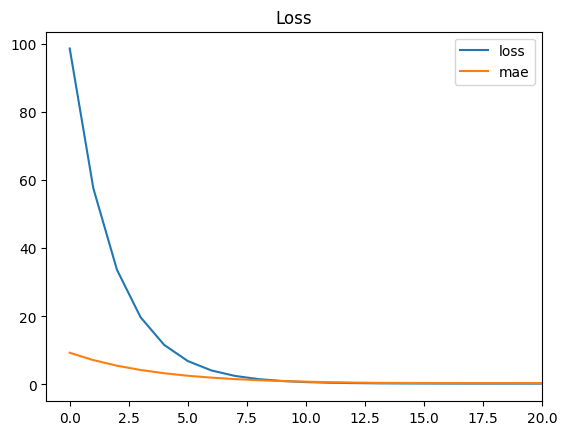

In [ ]:
# 훈련에 대한 결과가 저장된 history 변수를 사용하여 epoch별 훈련 손실 및 평가지표를 시각화

import matplotlib.pyplot as plt

# 20 epoch까지 Loss 수렴에 대한 시각화
plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["mae"], label = "mae")
plt.xlim(-1, 20)
plt.title("Loss")
plt.legend()
plt.show()

>> 첫 10 epoch까지 손실이 급격히 감소하고, 10 epoch를 넘어가면 감소 폭이 둔화되면서 조금씩 감소함

>> 즉, 모델 훈련 초기 단계에는 학습이 매우 빠른 속도로 진행되다가 일정 epcoh 이후에는 학습 속도가 느려지는 패턴을 보임

---

### **2-9. 검증**

* 모델 인스턴스의 `evaluate()` 메소드로 모델의 성능을 검증할 수 있음

    -> 일반적으로 검증 데이터셋을 입력하여 검증

In [ ]:
# 검증 셋 대신 훈련 데이터셋의 x, y를 대입하여 반환되는 결과를 확인

# 검증
model.evaluate(x, y)

1/1 [==============================] - 1s 883ms/step - loss: 8.1284e-05 - mae: 0.0077


[8.128357876557857e-05, 0.0077384947799146175]

>> 모델 훈련 단계에서 1,200번 epoch를 종료한 상태에서 출력된 값과 같음

>> 검증 단계에서는 모델이 훈련을 마친 상태의 가중치를 그대로 적용하여 손실과 평가지표를 계산하기 때문임

---

### **2-10. 예측**

* 훈련이 완료된 모델 인스턴스의 `predict()` 메소드에 새로운 입력 데이터를 넣어 주면 모델의 예측 값을 얻을 수 있음


In [ ]:
# 예측
model.predict([10])

1/1 [==============================] - 1s 588ms/step


array([[32.037403]], dtype=float32)

>> 데이터셋 생성 시 정의한 1차식이 y=3x+2이므로 정답에 꽤 근사한 값을 예측함

---

## **3. 심층 신경망으로 이미지 분류**

* 이미지 분류를 위해 단층이 아닌 더 깊은 층을 쌓아 깊이가 있는 딥러닝 모델을 생성

---

### **3-1. 케라스 내장 데이터셋 로드**

* 케라스는 모델 훈련에 필요한 샘플 데이터셋을 제공함

    * 데이터셋은 `tensorflow.keras.datasets` 서브패키지에 위치

    * datasets 패키지에 있는 데이터를 불러오기 위해 `load_data()` 메소드를 사용

        ->  이 함수는 훈련 데이터셋과 검증 데이터셋을 구분하여 제공


In [ ]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

In [ ]:
# load_data()로 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


>> 훈련 데이터셋과 검증 데이터셋을 반환

In [ ]:
# 로드된 데이터셋 확인
print("train set: ", x_train.shape, y_train.shape)
print("test set: ", x_test.shape, y_test.shape)

train set:  (60000, 28, 28) (60000,)
test set:  (10000, 28, 28) (10000,)


>> 훈련 셋에는 60,000개의 데이터가, 검증 셋에는 10,000개 데이터가 저장되어 있음

>> 입력 데이터에 해당하는 x_train, x_test에는 mnist 손글씨 이미지 데이터가 저장됨

>> 배열의 shape은 (데이터셋 크기, 28, 28)

>> 28, 28은 순서대로 이미지의 세로, 가로의 픽셀 크기를 나타냄

>> 각 입력 데이터에 대응되는 출력 데이터 y 또한 각각 60,000개와 10,000개가 1차원 벡터 형태로 정리되어 있음

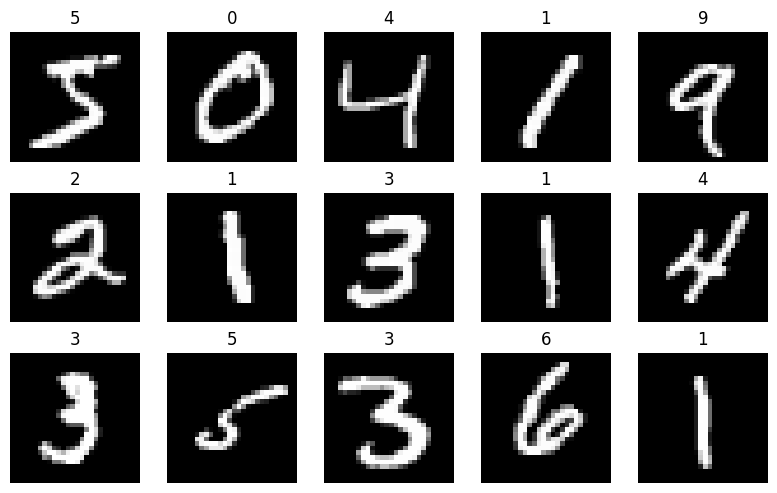

In [ ]:
# 데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
    ax = axes[i//5, i % 5]
    # imshow로 이미지 시각화
    ax.imshow(x_train[i], cmap = "gray")
    ax.axis("off")
    ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

---

### **3-2. 데이터 전처리**

* 이미지 데이터에 대하여 정규화를 통해 데이터의 범위를 조절함

* x_train은 넘파이 배열이며, 배열의 각 원소는 이미지를 구성하는 하나의 픽셀 값과 일대일 매칭됨

In [ ]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

>> 데이터가 0~255 범위의 값으로 이루어짐

>> 데이터의 범위를 0~1 사이의 값을 가지도록 정규화하기 위해서는 데이터의 최댓값인 255로 나눔


In [ ]:
# 픽셀 값의 최소/최대값 확인
print(f"정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}")

# 데이터 정규화
x_train = x_train / x_train.max()

# 정규화 후 최소/최대값 확인
print(f"정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}")

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [ ]:
# test 셋에도 정규화 동일 적용
x_test = x_test / x_test.max()

In [ ]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

---

### **3-3. Flatten 레이어**

* 정규화를 하더라도 개별 데이터 값의 범위는 축소되지만, 원본 배열의 형태는 그대로 유지됨

* 샘플 이미지의 형태는 (28, 28)로 이루어져 있고 2차원 입력으로 볼 수 있음

    -> 그러나 2차원 입력은 Dense 레이어에 입력값으로 넣을 수 없고, 반드시 1차원 배열이 들어가야 함

    -> 따라서 이미지 데이터를 1차원으로 전처리하여 주입해야 함

In [ ]:
print(f"변경 전 shape: {x_train.shape}")
print(f"1D으로 shape 변경 후: {x_train.reshape(60000, -1).shape}")

변경 전 shape: (60000, 28, 28)
1D으로 shape 변경 후: (60000, 784)


In [ ]:
# Flatten 레이어를 사용해 1차원으로 펼치기

print(f"변경 전 shape: {x_train.shape}")

# Flatten 레이어 적용 후 shape 확인
print(f"Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}")

변경 전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


---

### **3-4. 활성화 함수**

* 활성화 함수: 입력을 비선형 출력으로 변환해주는 함수

    * 일반적으로 선형관계를 나타내는 함수에 비선형성을 추가하는 방법으로 표현되기도 함

    * 비선형성을 추가하지 않고 선형 함수로만 층을 구성한다면 모델을 깊게 구성하더라도 결국은 선형함수로 표현되기 때문

* 자주 사용되는 활성화 함수: 시그모이드, 하이퍼볼릭 탄젠트, ReLU, Leaky ReLU 등

    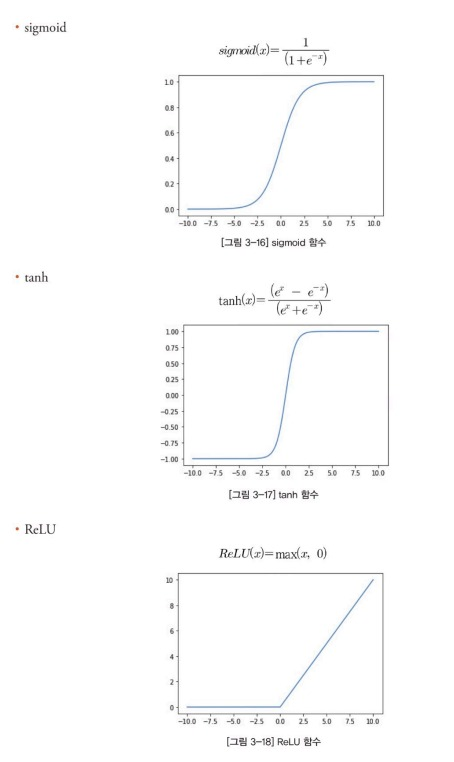

    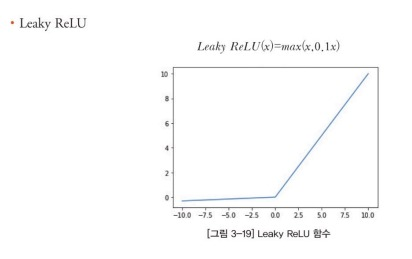

In [ ]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation = "relu")

* 별도의 층처럼 적용할 수도 있음

    -> 이렇게 별도의 층으로 적용하는 경우는 Dense 레이어 다음에 배치 정규화를 적용한 후 활성화 함수를 적용하고자 할 때 많이 사용됨

In [ ]:
# Dense 레이어와 relu 활성화 함수 레이어를 별도 적용한 경우
model = tf.keras.Sequential([
        tf.keras.layers.Dense(128),
        tf.keras.layers.Activation("relu")
])

---

### **3-5. 입력과 출력**

* 딥러닝 모델을 만들 때는 첫 번째 레이어에 입력 데이터의 형태를 나타내는 input_shape 매개변수를 지정하는 것이 일반적임

    -> 앞의 train_shape에서 데이터셋의 크기는 제외하고 이미지의 세로, 가로 형태를 나타내는 input_shape = (28, 28)를 input_shape로 지정

* 가장 마지막 레이어인 출력층의 노드 개수는 반드시 분류해야 할 클래스의 개수와 동일해야 함

    -> mnist는 0~9까지 총 10개의 클래스로 이루어져 있기 때문에 마지막 출력층의 노드 개수는 10개가 되어야 함

In [ ]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape = (28, 28)),
        tf.keras.layers.Dense(256, activation = "relu"),
        tf.keras.layers.Dense(64, activation = "relu"),
        tf.keras.layers.Dense(32, activation = "relu"),
        # 노드 = 10개(클래스 개수와 동일)
        tf.keras.layers.Dense(10, activation = "softmax"),
])

* 출력층의 노드 개수가 2개 이상인 경우는 softmax 활성화 함수를 적용

    -> 즉, 다중 분류 문제에서는 softmax 활성화 함수를 사용해야 함

* 반면, 이진 분류 모델의 출력층 노드 개수를 1개로 설정한 경우에는 sigmoid 활성화 함수를 적용

    -> 단, 이진 분류 모델이라도 출력 레이어의 클래스를 원핫 인코딩으로 변환하여 노드 개수가 2개인 경우에는 softmax 함수를 사용

In [ ]:
# 출력층 노드 = 1인 경우, sigmoid
tf.keras.layers.Dense(1, activation = "sigmoid")

# 출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10, activation = "softmax")

---

### **3-6. 손실함수**

* 분류 모델의 손실함수는 모델의 출력층에 따라 올바른 손실함수를 설정해야만 모델이 정상적으로 훈련할 수 있음
    
    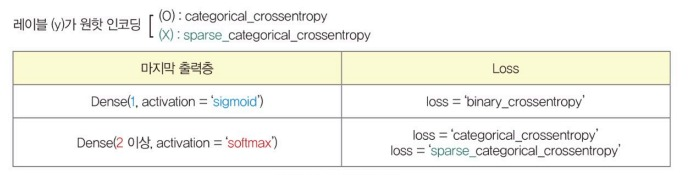

* 이진 분류기 생성 시 출력층의 노드 개수가 1개이면 activation="sigmoid"를 지정하며 손실함수로는 "binary_crossentropy"를 지정

In [ ]:
# 이진 분류(출력 노드 개수 = 1, sigmoid인 경우)
model.compile(loss = "binary_crossentropy")

* 출력층의 노드 개수가 2개 이상일 경우 activation = "softmax"와 같이 softmax 활성화 함수를 지정하고, 손실함수는 "categorical_crossentropy" 혹은 "sparse_categorical_crossentropy"를 지정

    * 출력 데이터가 원핫 벡터인 경우에는 "categorical_crossentropy"를 지정하고, 원핫 벡터가 아닌 경우에는 "sparse_categorical_crossentropy"를 지정

In [37]:
# y가 원핫 벡터인 경우
# [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,]
model.compile(loss = "categorical_crossentropy")

# y가 원핫 벡터가 아닌 경우
# [5]
model.compile(loss = "sparse_categorical_crossentropy")

>> mnist 손글씨 데이터셋은 클래스의 개수가 10개이므로 마지막 출력층의 노드 개수를 10으로 지정

>> 출력 데이터가 원핫 벡터가 아니고, 0~9까지 레이블 값을 갖기 때문에 손실함수는 "sparse_categorical_crossentropy"

---

### **3-7. 옵티마이저**

* 옵티마이저: 손실을 낮추기 위해서, 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는 데 사용되는 최적화 방법

    * 일반적으로 많이 사용되는 알고리즘은 Adam이며 대체적으로 좋은 성능을 발휘함

* 케라스에서 지원하는 옵티마이저: SGD, Adam, Adagrad, RMSprop 등등

* 옵티마이저는 클래스 인스턴스로 지정하거나 문자열로 지정 가능

    * 문자열로 지정: 클래스 이름을 소문자로 표기

    * 클래스 인스턴스로 지정: 학습률과 같은 하이퍼파라미터를 직접 설정 가능

In [38]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = adam)

# 문자열로 지정
model.compile(optimizer = "adam")

---

### **3-8. 평가지표**

* 분류 모델에 대한 평가지표는 정확도를 나타내는 "accuracy"가 가장 많이 사용되며 "auc", "precision", "recall" 등의 지표도 많이 사용됨

    -> 모델 컴파일 단계에서 metrics 매개변수에 파이썬 리스트 형태로 하나 이상의 평가지표를 지정하여 여러 지표들을 동시에 참고할 수 있음

* 평가지표도 옵티마이저와 마찬가지로 클래스 인스턴스로 지정하거나 문자열로 지정할 수 있음

In [39]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = [acc])

In [40]:
# 문자열로 지정
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

---

### **3-9. 훈련**

* 모델을 훈련할 때 검증 셋을 추가 지정하면, 매 epoch마다 훈련 손실과 검증 손실, 그리고 각 셋에 대한 평가지표를 나란히 출력함

    * 검증 셋을 지정하는 방법은 validation_data 매개변수에 튜플 형식의 검증 셋을 지정해주면 됨

In [41]:
# 훈련
model.fit(x_train, y_train,
          # 검증 셋 지정
          validation_data = (x_test, y_test),
          epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2302 - accuracy: 0.9310 - val_loss: 0.1080 - val_accuracy: 0.9668
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0929 - accuracy: 0.9711 - val_loss: 0.0879 - val_accuracy: 0.9727
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0659 - accuracy: 0.9790 - val_loss: 0.0858 - val_accuracy: 0.9726
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0503 - accuracy: 0.9841 - val_loss: 0.0753 - val_accuracy: 0.9759
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0395 - accuracy: 0.9869 - val_loss: 0.1090 - val_accuracy: 0.9706
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0336 - accuracy: 0.9890 - val_loss: 0.0918 - val_accuracy: 0.9745
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0301 - accuracy: 0.9899 - val_loss: 0.0953 - val_a

---

### **3-10. 평가**

* 10회의 epoch가 끝나고 훈련이 종료된 뒤 `evaluate()` 메소드로 모델 성능을 검증하고 평가 결과를 확인할 수 있음

    -> 이때 검증 셋인 x_test, y_test를 함수에 전달

    -> `evaluate()` 메소드는 컴파일 단계에서 지정한 손실과 정확도를 순서대로 반환함

In [42]:
# 검증
test_loss, test_acc = model.evaluate(x_test, y_test)

print("검증 셋 정확도: ", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1123 - accuracy: 0.9749
검증 셋 정확도:  0.9749000072479248


>> 정확도만 보면 약 97.5%의 정확도를 기록함

---

### **3-11. 예측**

* 훈련된 모델로 새로운 이미지에 대한 분류 값을 예측하는 작업을 수행할 수 있음

    * `predict()` 메소드에 이미지 데이터를 넣어주면 모델의 예측 결과를 반환

        -> 여기서는 예측에 필요한 새로운 데이터셋이 준비되어 있지 않기 때문에, 검증 데이터셋의 입력 데이터인 x_test를 사용

In [43]:
# 예측
predictions = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


>> predictions 변수에 모델이 예측한 분류 결과를 넘파이 배열 형태로 저장함



In [44]:
# 예측 결과 출력
predictions[0]

array([3.3598312e-08, 3.2897523e-07, 6.9344125e-08, 3.3521919e-06,
       1.2999872e-10, 4.9622493e-09, 2.1208319e-14, 9.9999601e-01,
       2.8880173e-10, 1.7410980e-07], dtype=float32)

>> 첫 번째 입력 이미지에 대한 분류 결과를 출력해보면 10개의 확률값들이 출력됨

>> 모델의 마지막 출력층의 노드 개수가 10개로 지정되었기 때문에 10개의 값이 출력된 것

* softmax 활성화 함수를 거친 10개의 출력 값은 순차적으로 0~9 까지의 10개의 개별 클래스에 대한 분류 확률값을 나타냄

    -> 이 중 가장 높은 확률값을 가진 클래스가 최종 예측된 클래스임
    
    -> 넘파이 배열의 argmax를 활용하여 가장 높은 확률값을 가지는 클래스 결과를 확인할 수 있음


In [45]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis = 1))

7
[7 2 1 0 4 1 4 9 5 9]


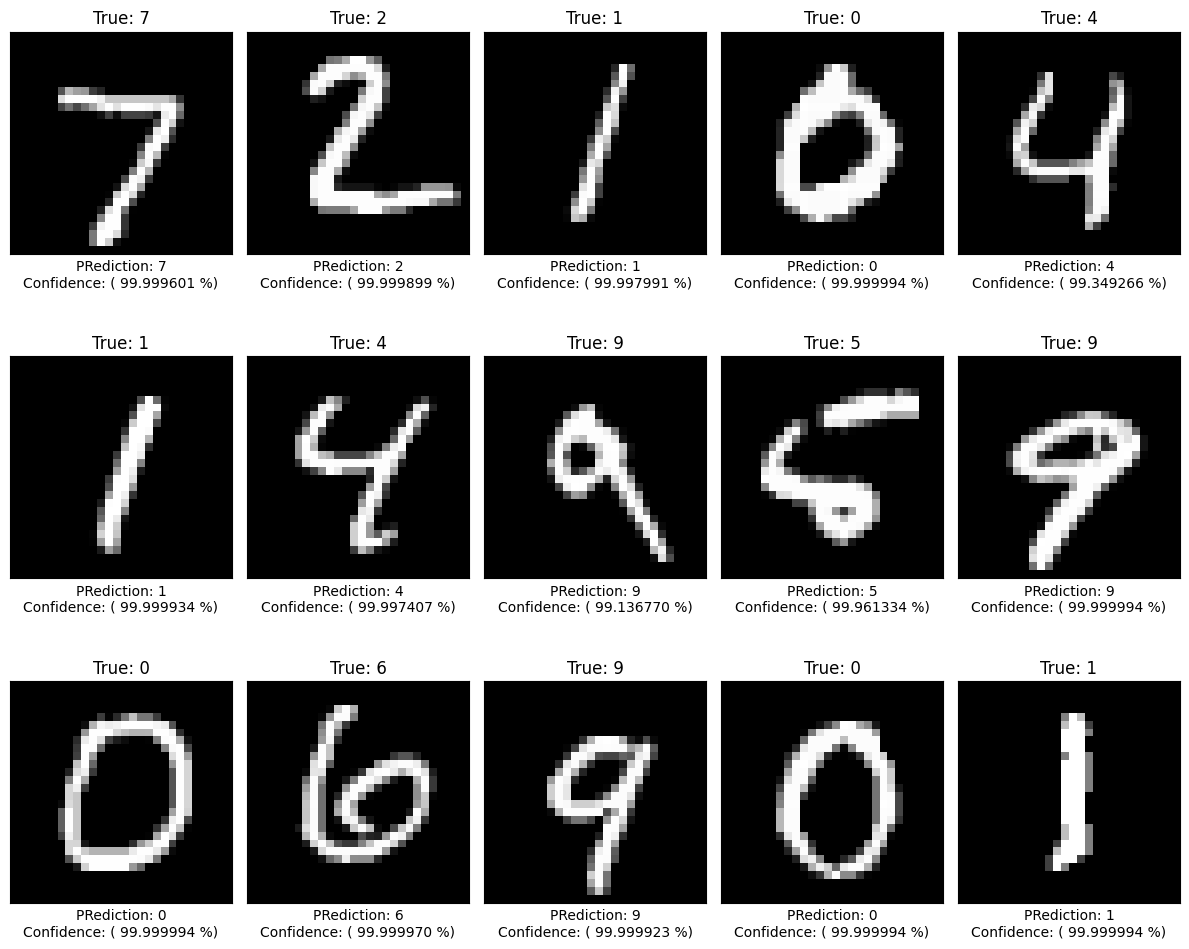

In [46]:
# 15개 데이터를 예측한 결과에 대한 시각화
import matplotlib.pyplot as plt
def get_one_result(idx):
    img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100 * np.max(predictions[idx])
    return img, y_true, y_pred, confidence

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 10)
for i in range(15):
    ax = axes[i // 5, i % 5]
    img, y_true, y_pred, confidence = get_one_result(i)
    # imshow로 이미지 시각화
    ax.imshow(img, cmap = "gray")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"True: {y_true}")
    ax.set_xlabel(f"PRediction: {y_pred}\nConfidence: ({confidence: 2f} %)")
plt.tight_layout()
plt.show()